In [3]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
#from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *
from qiskit.quantum_info import Operator, average_gate_fidelity
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.aer.noise import NoiseModel, pauli_error
# Loading your IBM Q account(s)
#provider = IBMQ.load_account()

In [4]:
#Question 1
q1 = QuantumRegister(2)
c1 = ClassicalRegister(2)
qCircuit1 = QuantumCircuit(q1,c1)
qCircuit1.h(q1[0])
qCircuit1.cx(q1[0],q1[1])
qCircuit1.draw()


┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
c0_0: ══════════
                
c0_1: ══════════

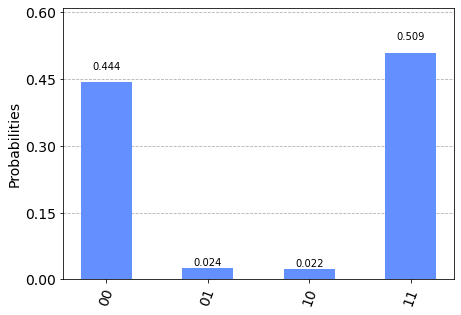

In [5]:
# Question 2

q2 = QuantumRegister(2)
c2 = ClassicalRegister(2)
qCircuit2 = QuantumCircuit(q2,c2)
noise_model = NoiseModel()          #define error
p_error = 0.05
bitFlip = pauli_error([('X',p_error), ('I',1-2*p_error),('Z',p_error)])
qCircuit2.h(q2[0])

#adding noisy channel 
qCircuit2.barrier()

qCircuit2.id(q2[0])
qCircuit2.id(q2[1])
noise_model.add_all_qubit_quantum_error(bitFlip, 'id')
qCircuit2.barrier()
qCircuit2.cx(q2[0],q2[1])

#Making measurement
qCircuit2.barrier()

qCircuit2.measure([0,1],[0,1])
result = execute(qCircuit2, backend = Aer.get_backend('qasm_simulator'), noise_model = noise_model, shots = 1024).result()
count = result.get_counts(qCircuit2)
plot_histogram(count)



In [6]:
qCircuit2.draw()

┌───┐ ░ ┌───┐ ░       ░ ┌─┐   
q1_0: ┤ H ├─░─┤ I ├─░───■───░─┤M├───
      └───┘ ░ ├───┤ ░ ┌─┴─┐ ░ └╥┘┌─┐
q1_1: ──────░─┤ I ├─░─┤ X ├─░──╫─┤M├
            ░ └───┘ ░ └───┘ ░  ║ └╥┘
c1_0: ═════════════════════════╩══╬═
                                  ║ 
c1_1: ════════════════════════════╩═

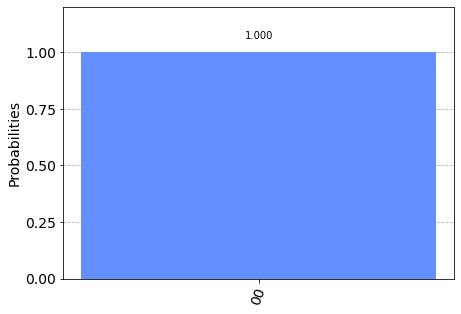

In [7]:
#Question 3
#We use bitflip encoding scheme first to correct bits corrupted by bit-flip channel. After that to handle 
# phase flip channel, we apply Hadamard gate to each qubit and use the same technique.
qubit = QuantumRegister(8)
cbit  = ClassicalRegister(2)
cir3 = QuantumCircuit(qubit, cbit)
cir3.h(qubit[0])
cir3.cx(qubit[0],qubit[1])
cir3.cx(qubit[0],qubit[2])

#bitFlip = pauli_error([('X',p_error), ('I',1-2*p_error),('Z',p_error)])

#error part
cir3.barrier()

for i in range(4):
    cir3.id(qubit[i])

cir3.barrier()
#entangle qubit0 with qubit3
cir3.cx(qubit[0],qubit[3])

cir3.barrier()
#correcting bit flip at qubit3
#correcting corrupted bits using X0X1 (applying X gate to qubit0 and qubit1, in here we use CNOT gate but the main idea is try to see
#if qubit0 and qubit1 are the same)
cir3.cx(qubit[0], qubit[4])
cir3.cx(qubit[3], qubit[4])
cir3.cx(qubit[4], qubit[3])

cir3.barrier()
#correcting bit flip at qubit 0,1,2 (using the same principle above)

cir3.cx(qubit[0], qubit[5])
cir3.cx(qubit[1], qubit[5])
cir3.cx(qubit[1], qubit[6])
cir3.cx(qubit[2], qubit[6])
cir3.cx(qubit[5], qubit[0])
cir3.cx(qubit[5], qubit[3])
cir3.cx(qubit[6], qubit[2])

cir3.barrier()
# At that stage we have state (|0000> + |1111>)/sqrt(2) or (|0000>-|1111>)/sqrt(2). We reduce the state to
# (|0000> + |1001>)/sqrt(2) or (|0000>-|1001>)/sqrt(2) so that we only have to deal with 2 qubits 

cir3.cx(qubit[0], qubit[1])
cir3.cx(qubit[0], qubit[2])

cir3.barrier()
#To correct phase flip error, we write the state in the basis |+> and |-> by applying Hadamard gates and then use 
# the same technique as above (in fact we only have to measure the similarity of the two qubits, if they are different, flip a qubit)

cir3.h([qubit[0], qubit[3]])
cir3.cx(qubit[0], qubit[7])
cir3.cx(qubit[3], qubit[7])
cir3.cx(qubit[7], qubit[3])
cir3.h([qubit[0], qubit[3]])

cir3.barrier()
#convert (|00> + |11>)/sqrt(2) to |00> so that we can measure

cir3.cx(qubit[0], qubit[3])
cir3.h(qubit[0])

cir3.barrier()

cir3.measure([qubit[0],qubit[3]], [cbit[0],cbit[1]])
res3 = execute(cir3, backend = Aer.get_backend('qasm_simulator'), noise_model = noise_model, shots = 1024).result()
count3 = res3.get_counts(cir3)
plot_histogram(count3)

In [8]:
cir3.draw()

┌───┐           ░ ┌───┐ ░       ░                 ░                ┌───┐»
q2_0: ┤ H ├──■────■───░─┤ I ├─░───■───░───■─────────────░───■────────────┤ X ├»
      └───┘┌─┴─┐  │   ░ ├───┤ ░   │   ░   │             ░   │            └─┬─┘»
q2_1: ─────┤ X ├──┼───░─┤ I ├─░───┼───░───┼─────────────░───┼────■────■────┼──»
           └───┘┌─┴─┐ ░ ├───┤ ░   │   ░   │             ░   │    │    │    │  »
q2_2: ──────────┤ X ├─░─┤ I ├─░───┼───░───┼─────────────░───┼────┼────┼────┼──»
                └───┘ ░ ├───┤ ░ ┌─┴─┐ ░   │       ┌───┐ ░   │    │    │    │  »
q2_3: ────────────────░─┤ I ├─░─┤ X ├─░───┼────■──┤ X ├─░───┼────┼────┼────┼──»
                      ░ └───┘ ░ └───┘ ░ ┌─┴─┐┌─┴─┐└─┬─┘ ░   │    │    │    │  »
q2_4: ────────────────░───────░───────░─┤ X ├┤ X ├──■───░───┼────┼────┼────┼──»
                      ░       ░       ░ └───┘└───┘      ░ ┌─┴─┐┌─┴─┐  │    │  »
q2_5: ────────────────░───────░───────░─────────────────░─┤ X ├┤ X ├──┼────■──»
                      ░       ░       ░                 ░ └───┘└───┘┌─┴─┐     »
q2_6: ────────────────░───────░───────░─────────────────░───────────┤ X ├─────»
                      ░       ░       ░                 ░           └───┘     »
q2_7: ────────────────░───────░───────░─────────────────░─────────────────────»
                      ░       ░       ░                 ░                     »
c2_0: ════════════════════════════════════════════════════════════════════════»
                                                                              »
c2_1: ════════════════════════════════════════════════════════════════════════»
                                                                              »
«                      ░            ░ ┌───┐     ┌───┐           ░      ┌───┐ ░ »
«q2_0: ────────────────░───■────■───░─┤ H ├──■──┤ H ├───────────░───■──┤ H ├─░─»
«                      ░ ┌─┴─┐  │   ░ └───┘  │  └───┘           ░   │  └───┘ ░ »
«q2_1: ────────────────░─┤ X ├──┼───░────────┼──────────────────░───┼────────░─»
«                ┌───┐ ░ └───┘┌─┴─┐ ░        │                  ░   │        ░ »
«q2_2: ──■───────┤ X ├─░──────┤ X ├─░────────┼──────────────────░───┼────────░─»
«        │  ┌───┐└─┬─┘ ░      └───┘ ░ ┌───┐  │       ┌───┐┌───┐ ░ ┌─┴─┐      ░ »
«q2_3: ──┼──┤ X ├──┼───░────────────░─┤ H ├──┼────■──┤ X ├┤ H ├─░─┤ X ├──────░─»
«        │  └─┬─┘  │   ░            ░ └───┘  │    │  └─┬─┘└───┘ ░ └───┘      ░ »
«q2_4: ──┼────┼────┼───░────────────░────────┼────┼────┼────────░────────────░─»
«        │    │    │   ░            ░        │    │    │        ░            ░ »
«q2_5: ──┼────■────┼───░────────────░────────┼────┼────┼────────░────────────░─»
«      ┌─┴─┐       │   ░            ░        │    │    │        ░            ░ »
«q2_6: ┤ X ├───────■───░────────────░────────┼────┼────┼────────░────────────░─»
«      └───┘           ░            ░      ┌─┴─┐┌─┴─┐  │        ░            ░ »
«q2_7: ────────────────░────────────░──────┤ X ├┤ X ├──■────────░────────────░─»
«                      ░            ░      └───┘└───┘           ░            ░ »
«c2_0: ════════════════════════════════════════════════════════════════════════»
«                                                                              »
«c2_1: ════════════════════════════════════════════════════════════════════════»
«                                                                              »
«      ┌─┐   
«q2_0: ┤M├───
«      └╥┘   
«q2_1: ─╫────
«       ║    
«q2_2: ─╫────
«       ║ ┌─┐
«q2_3: ─╫─┤M├
«       ║ └╥┘
«q2_4: ─╫──╫─
«       ║  ║ 
«q2_5: ─╫──╫─
«       ║  ║ 
«q2_6: ─╫──╫─
«       ║  ║ 
«q2_7: ─╫──╫─
«       ║  ║ 
«c2_0: ═╩══╬═
«          ║ 
«c2_1: ════╩═
«

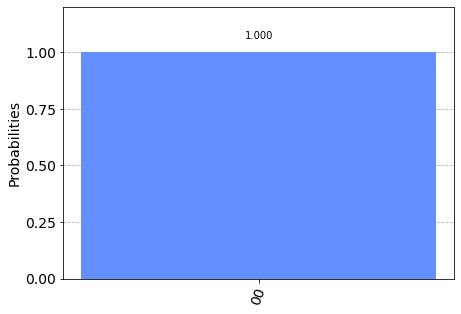

In [9]:
#Question 3 (again)
"""
Due to the particular property of the desired state, we can use other method to correct corrupted states.
Since the system is prone to bit flip and phase flip error, from (|00> + |11>)/sqrt(2), the set of possible state after error
is {(|00> + |11>)/sqrt(2),(|00> - |11>)/sqrt(2),(|01> + |10>)/sqrt(2),(|01> - |10>)/sqrt(2)}. So in using the set of stabilizers
corresponding to this kind of error, we can correct the corrupted state without using bit flip and phase flip code.
"""
qubit4 = QuantumRegister(4)
cbit4  = ClassicalRegister(2)
cir4 = QuantumCircuit(qubit4, cbit4)
cir4.h(qubit4[0])
#adding error
cir4.barrier()
cir4.id(qubit4[0])
cir4.id(qubit4[1])
#CNOT gate to create Bell-state
cir4.barrier()
cir4.cx(qubit4[0],qubit4[1])
#correcting using X0X1 (applying X gate to qubit0 and qubit1, in here we use CNOT gate but the main idea is try to see
#if qubit0 and qubit1 are the same)
cir4.barrier()
cir4.cx(qubit4[0],qubit4[2])
cir4.cx(qubit4[1],qubit4[2])
cir4.cx(qubit4[2],qubit4[1])
cir4.barrier()
cir4.h([qubit4[0], qubit4[1]])
cir4.cx(qubit4[0],qubit4[3])
cir4.cx(qubit4[1],qubit4[3])
cir4.cx(qubit4[3],qubit4[1])
cir4.h([qubit4[0], qubit4[1]])

#convert (|00> + |11>)/sqrt(2) to |00> so that we can measure
cir4.barrier()
cir4.cx(qubit4[0], qubit4[1])
cir4.h(qubit4[0])

#Measurement
cir4.barrier()
cir4.measure(qubit4[0:2],cbit4[0:2])
result4 = execute(cir4, backend = Aer.get_backend('qasm_simulator'), noise_model = noise_model, shots = 1024).result()
count = result4.get_counts()
plot_histogram(count)






In [10]:
cir4.draw()

┌───┐ ░ ┌───┐ ░       ░                 ░ ┌───┐     ┌───┐           ░ »
q3_0: ┤ H ├─░─┤ I ├─░───■───░───■─────────────░─┤ H ├──■──┤ H ├───────────░─»
      └───┘ ░ ├───┤ ░ ┌─┴─┐ ░   │       ┌───┐ ░ ├───┤  │  └───┘┌───┐┌───┐ ░ »
q3_1: ──────░─┤ I ├─░─┤ X ├─░───┼────■──┤ X ├─░─┤ H ├──┼────■──┤ X ├┤ H ├─░─»
            ░ └───┘ ░ └───┘ ░ ┌─┴─┐┌─┴─┐└─┬─┘ ░ └───┘  │    │  └─┬─┘└───┘ ░ »
q3_2: ──────░───────░───────░─┤ X ├┤ X ├──■───░────────┼────┼────┼────────░─»
            ░       ░       ░ └───┘└───┘      ░      ┌─┴─┐┌─┴─┐  │        ░ »
q3_3: ──────░───────░───────░─────────────────░──────┤ X ├┤ X ├──■────────░─»
            ░       ░       ░                 ░      └───┘└───┘           ░ »
c3_0: ══════════════════════════════════════════════════════════════════════»
                                                                            »
c3_1: ══════════════════════════════════════════════════════════════════════»
                                                                            »
«           ┌───┐ ░ ┌─┐   
«q3_0: ──■──┤ H ├─░─┤M├───
«      ┌─┴─┐└───┘ ░ └╥┘┌─┐
«q3_1: ┤ X ├──────░──╫─┤M├
«      └───┘      ░  ║ └╥┘
«q3_2: ───────────░──╫──╫─
«                 ░  ║  ║ 
«q3_3: ───────────░──╫──╫─
«                 ░  ║  ║ 
«c3_0: ══════════════╩══╬═
«                       ║ 
«c3_1: ═════════════════╩═
«